In [1]:
import numpy as np
import sys
sys.path.append('/eagle/fthmc/run')
from Scaling_FT_HMC.utils.func import auto_from_chi
from lametlat.utils.plot_settings import *

### L32 b3

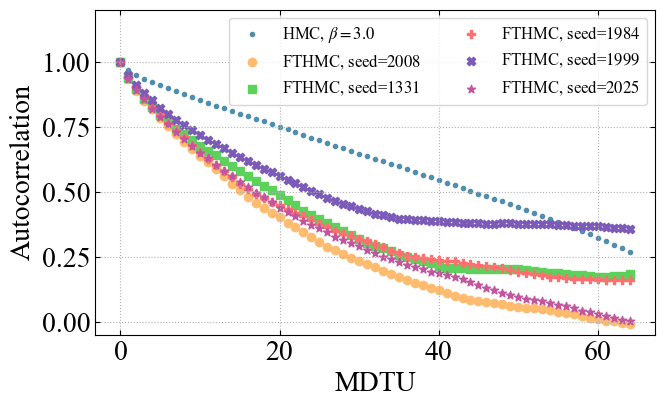

In [ ]:
hmc_L32_b3_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta3.0.csv')
fthmc_base_L32_b3_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b3_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b3_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b3_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b3_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_2025.csv')

beta = 3.0

hmc_L32_b3_auto = auto_from_chi(hmc_L32_b3_topo, max_lag=64, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_2008 = auto_from_chi(fthmc_base_L32_b3_topo_2008, max_lag=64, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_1331 = auto_from_chi(fthmc_base_L32_b3_topo_1331, max_lag=64, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_1984 = auto_from_chi(fthmc_base_L32_b3_topo_1984, max_lag=64, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_1999 = auto_from_chi(fthmc_base_L32_b3_topo_1999, max_lag=64, beta=beta, volume=32**2)
fthmc_base_L32_b3_auto_2025 = auto_from_chi(fthmc_base_L32_b3_topo_2025, max_lag=64, beta=beta, volume=32**2)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b3_auto)), hmc_L32_b3_auto, label='HMC, $\\beta=3.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_2008)), fthmc_base_L32_b3_auto_2008, label='FTHMC, seed=$2008$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_1331)), fthmc_base_L32_b3_auto_1331, label='FTHMC, seed=$1331$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_1984)), fthmc_base_L32_b3_auto_1984, label='FTHMC, seed=$1984$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_1999)), fthmc_base_L32_b3_auto_1999, label='FTHMC, seed=$1999$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_2025)), fthmc_base_L32_b3_auto_2025, label='FTHMC, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(-0.05, 1.2)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/autocorrelation_L32_b3.pdf', transparent=True)
plt.show()


In [3]:

gamma_hmc = 1 / (1 - hmc_L32_b3_auto[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b3_auto_2008[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b3_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b3_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b3_auto_1999[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b3_auto_2025[16])

gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b3_mean = np.mean([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])
gamma_ratio_L32_b3_std = np.std([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b3: {gamma_ratio_2008}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b3: {gamma_ratio_L32_b3_mean}")
print(f"std(16) for L32 b3: {gamma_ratio_L32_b3_std}")

deltaQ_hmc = [ abs(hmc_L32_b3_topo[i] - hmc_L32_b3_topo[i-1]) for i in range(1, len(hmc_L32_b3_topo))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b3_topo_2008[i] - fthmc_base_L32_b3_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_2008))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b3_topo_1331[i] - fthmc_base_L32_b3_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b3_topo_1984[i] - fthmc_base_L32_b3_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b3_topo_1999[i] - fthmc_base_L32_b3_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_1999))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b3_topo_2025[i] - fthmc_base_L32_b3_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_2025))]

deltaQ_hmc_L32_b3_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b3_mean = np.mean([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b3_std = np.std([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b3: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b3: {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_mean}")
print(f"std(deltaQ) for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_std}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b3: 2.4809400826446284, 2.0973140495867773, 2.3409090909090917, 1.8293904958677687, 2.3019628099173564
mean(16) for L32 b3: 2.2101033057851245
std(16) for L32 b3: 0.22652352706502998

>>> deltaQ
deltaQ for HMC L32 b3: 0.49474969474969477
deltaQ for FTHMC L32 b3: 0.8136752136752137, 0.7987789987789988, 0.6114774114774115, 0.5721611721611721, 0.8134310134310134
mean(deltaQ) for FTHMC L32 b3: 0.7219047619047618
std(deltaQ) for FTHMC L32 b3: 0.10707554456858683


### L32 b4

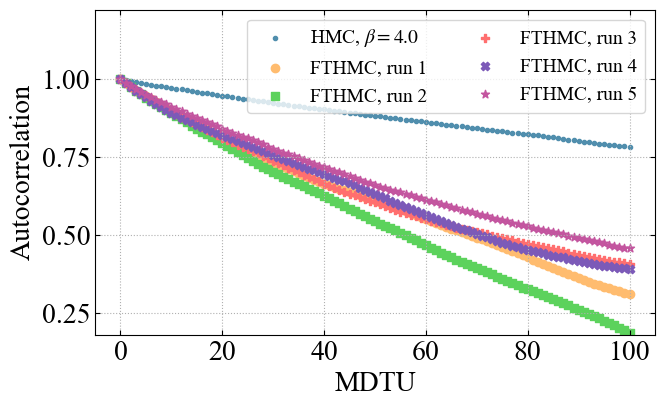

In [ ]:
hmc_L32_b4_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta4.0.csv')
fthmc_base_L32_b4_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b4_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b4_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b4_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b4_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta4.0_base_train_b3.0_L32_2025.csv')

max_lag = 100
beta = 4.0

hmc_L32_b4_auto = auto_from_chi(hmc_L32_b4_topo, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_2008 = auto_from_chi(fthmc_base_L32_b4_topo_2008, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_1331 = auto_from_chi(fthmc_base_L32_b4_topo_1331, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_1984 = auto_from_chi(fthmc_base_L32_b4_topo_1984, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_1999 = auto_from_chi(fthmc_base_L32_b4_topo_1999, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b4_auto_2025 = auto_from_chi(fthmc_base_L32_b4_topo_2025, max_lag=max_lag, beta=beta, volume=32**2)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b4_auto)), hmc_L32_b4_auto, label='HMC, $\\beta=4.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_2008)), fthmc_base_L32_b4_auto_2008, label='FTHMC, run 1', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_1331)), fthmc_base_L32_b4_auto_1331, label='FTHMC, run 2', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_1984)), fthmc_base_L32_b4_auto_1984, label='FTHMC, run 3', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_1999)), fthmc_base_L32_b4_auto_1999, label='FTHMC, run 4', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b4_auto_2025)), fthmc_base_L32_b4_auto_2025, label='FTHMC, run 5', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.18, 1.22)
ax.legend(ncol=2, loc='upper right', fontsize=14)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/autocorrelation_L32_b4.pdf', transparent=True)
plt.show()


In [5]:
gamma_hmc = 1 / (1 - hmc_L32_b4_auto[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b4_auto_2008[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b4_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b4_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b4_auto_1999[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b4_auto_2025[16])

gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b4_mean = np.mean([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])
gamma_ratio_L32_b4_std = np.std([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b4: {gamma_ratio_2008}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b4: {gamma_ratio_L32_b4_mean}")
print(f"std(16) for L32 b4: {gamma_ratio_L32_b4_std}")

deltaQ_hmc = [ abs(hmc_L32_b4_topo[i] - hmc_L32_b4_topo[i-1]) for i in range(1, len(hmc_L32_b4_topo))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b4_topo_2008[i] - fthmc_base_L32_b4_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_2008))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b4_topo_1331[i] - fthmc_base_L32_b4_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b4_topo_1984[i] - fthmc_base_L32_b4_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b4_topo_1999[i] - fthmc_base_L32_b4_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_1999))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b4_topo_2025[i] - fthmc_base_L32_b4_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b4_topo_2025))]

deltaQ_hmc_L32_b4_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b4_mean = np.mean([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b4_std = np.std([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b4: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b4: {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) for FTHMC L32 b4: {deltaQ_fthmc_L32_b4_mean}")
print(f"std(deltaQ) for FTHMC L32 b4: {deltaQ_fthmc_L32_b4_std}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b4: 3.447079646017703, 3.8003539823008907, 3.4591150442477914, 3.4683185840707993, 2.9660176991150484
mean(16) for L32 b4: 3.4281769911504463
std(16) for L32 b4: 0.26647054055903674

>>> deltaQ
deltaQ for HMC L32 b4: 0.08986568986568987
deltaQ for FTHMC L32 b4: 0.19096459096459095, 0.19584859584859585, 0.18852258852258852, 0.19462759462759463, 0.17655677655677657
mean(deltaQ) for FTHMC L32 b4: 0.1893040293040293
std(deltaQ) for FTHMC L32 b4: 0.006885234438075371


### L32 b5

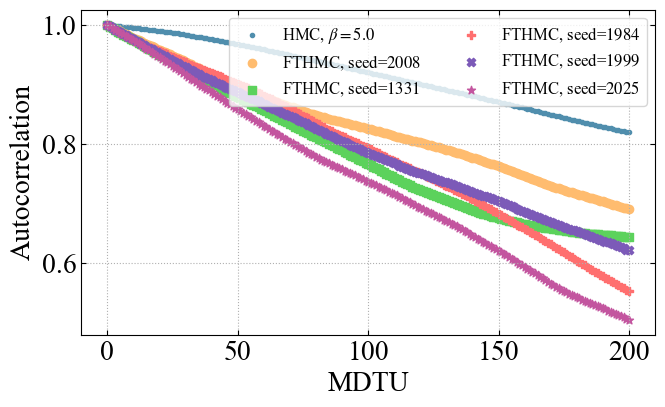

In [ ]:
hmc_L32_b5_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta5.0.csv')
fthmc_base_L32_b5_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b5_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b5_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b5_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b5_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta5.0_base_train_b3.0_L32_2025.csv')

max_lag = 200
beta = 5.0

hmc_L32_b5_auto = auto_from_chi(hmc_L32_b5_topo, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_2008 = auto_from_chi(fthmc_base_L32_b5_topo_2008, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_1331 = auto_from_chi(fthmc_base_L32_b5_topo_1331, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_1984 = auto_from_chi(fthmc_base_L32_b5_topo_1984, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_1999 = auto_from_chi(fthmc_base_L32_b5_topo_1999, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b5_auto_2025 = auto_from_chi(fthmc_base_L32_b5_topo_2025, max_lag=max_lag, beta=beta, volume=32**2)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b5_auto)), hmc_L32_b5_auto, label='HMC, $\\beta=5.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_2008)), fthmc_base_L32_b5_auto_2008, label='FTHMC, seed=$2008$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_1331)), fthmc_base_L32_b5_auto_1331, label='FTHMC, seed=$1331$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_1984)), fthmc_base_L32_b5_auto_1984, label='FTHMC, seed=$1984$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_1999)), fthmc_base_L32_b5_auto_1999, label='FTHMC, seed=$1999$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b5_auto_2025)), fthmc_base_L32_b5_auto_2025, label='FTHMC, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


# ax.set_ylim(0.75, 1.1)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/autocorrelation_L32_b5.pdf', transparent=True)
plt.show()


In [7]:
gamma_hmc = 1 / (1 - hmc_L32_b5_auto[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b5_auto_2008[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b5_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b5_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b5_auto_1999[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b5_auto_2025[16])

gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b5_mean = np.mean([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])
gamma_ratio_L32_b5_std = np.std([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b5: {gamma_ratio_2008}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b5: {gamma_ratio_L32_b5_mean}")
print(f"std(16) for L32 b5: {gamma_ratio_L32_b5_std}")

deltaQ_hmc = [ abs(hmc_L32_b5_topo[i] - hmc_L32_b5_topo[i-1]) for i in range(1, len(hmc_L32_b5_topo))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b5_topo_2008[i] - fthmc_base_L32_b5_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_2008))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b5_topo_1331[i] - fthmc_base_L32_b5_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b5_topo_1984[i] - fthmc_base_L32_b5_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b5_topo_1999[i] - fthmc_base_L32_b5_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_1999))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b5_topo_2025[i] - fthmc_base_L32_b5_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b5_topo_2025))]

deltaQ_hmc_L32_b5_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b5_mean = np.mean([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b5_std = np.std([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b5: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b5: {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) for FTHMC L32 b5: {deltaQ_fthmc_L32_b5_mean}")
print(f"std(deltaQ) for FTHMC L32 b5: {deltaQ_fthmc_L32_b5_std}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b5: 4.10696517412938, 4.835820895522422, 4.435323383084603, 4.69154228855724, 5.16915422885576
mean(16) for L32 b5: 4.647761194029881
std(16) for L32 b5: 0.3596454061955643

>>> deltaQ
deltaQ for HMC L32 b5: 0.011477411477411478
deltaQ for FTHMC L32 b5: 0.034432234432234435, 0.03956043956043956, 0.03394383394383394, 0.03492063492063492, 0.03492063492063492
mean(deltaQ) for FTHMC L32 b5: 0.03555555555555555
std(deltaQ) for FTHMC L32 b5: 0.00203493691389496


### L32 b6

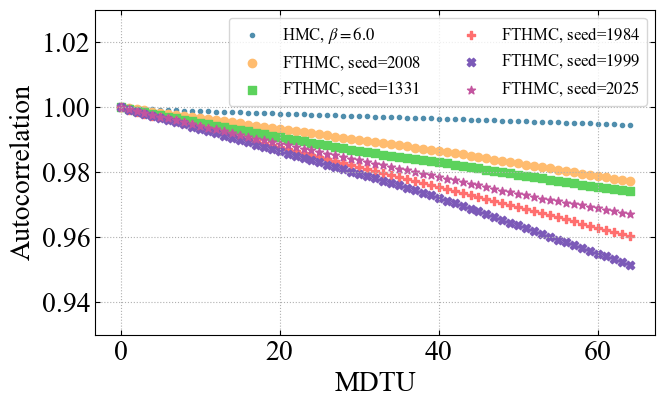

In [ ]:
hmc_L32_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta6.0.csv')
fthmc_base_L32_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_2025.csv')

max_lag = 64
beta = 6.0

hmc_L32_b6_auto = auto_from_chi(hmc_L32_b6_topo, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_2008 = auto_from_chi(fthmc_base_L32_b6_topo_2008, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_1331 = auto_from_chi(fthmc_base_L32_b6_topo_1331, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_1984 = auto_from_chi(fthmc_base_L32_b6_topo_1984, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_1999 = auto_from_chi(fthmc_base_L32_b6_topo_1999, max_lag=max_lag, beta=beta, volume=32**2)
fthmc_base_L32_b6_auto_2025 = auto_from_chi(fthmc_base_L32_b6_topo_2025, max_lag=max_lag, beta=beta, volume=32**2)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b6_auto)), hmc_L32_b6_auto, label='HMC, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_2008)), fthmc_base_L32_b6_auto_2008, label='FTHMC, seed=$2008$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1331)), fthmc_base_L32_b6_auto_1331, label='FTHMC, seed=$1331$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1984)), fthmc_base_L32_b6_auto_1984, label='FTHMC, seed=$1984$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1999)), fthmc_base_L32_b6_auto_1999, label='FTHMC, seed=$1999$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_2025)), fthmc_base_L32_b6_auto_2025, label='FTHMC, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.93, 1.03)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/autocorrelation_L32_b6.pdf', transparent=True)
plt.show()


In [9]:
gamma_hmc = 1 / (1 - hmc_L32_b6_auto[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b6_auto_2008[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b6_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b6_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b6_auto_1999[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b6_auto_2025[16])

gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b6_mean = np.mean([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])
gamma_ratio_L32_b6_std = np.std([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b6: {gamma_ratio_2008}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b6: {gamma_ratio_L32_b6_mean}")
print(f"std(16) for L32 b6: {gamma_ratio_L32_b6_std}")

deltaQ_hmc = [ abs(hmc_L32_b6_topo[i] - hmc_L32_b6_topo[i-1]) for i in range(1, len(hmc_L32_b6_topo))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b6_topo_2008[i] - fthmc_base_L32_b6_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_2008))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b6_topo_1331[i] - fthmc_base_L32_b6_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b6_topo_1984[i] - fthmc_base_L32_b6_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b6_topo_1999[i] - fthmc_base_L32_b6_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1999))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b6_topo_2025[i] - fthmc_base_L32_b6_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_2025))]

deltaQ_hmc_L32_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b6_mean = np.mean([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b6_std = np.std([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b6: {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_mean}")
print(f"std(deltaQ) for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_std}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b6: 3.2500000000000338, 4.53125000000002, 5.937500000000025, 6.593749999999996, 5.531250000000021
mean(16) for L32 b6: 5.168750000000019
std(16) for L32 b6: 1.1697021522592739

>>> deltaQ
deltaQ for HMC L32 b6: 0.002686202686202686
deltaQ for FTHMC L32 b6: 0.0031746031746031746, 0.005372405372405372, 0.008302808302808303, 0.007081807081807082, 0.005860805860805861
mean(deltaQ) for FTHMC L32 b6: 0.0059584859584859585
std(deltaQ) for FTHMC L32 b6: 0.0017239914622439844


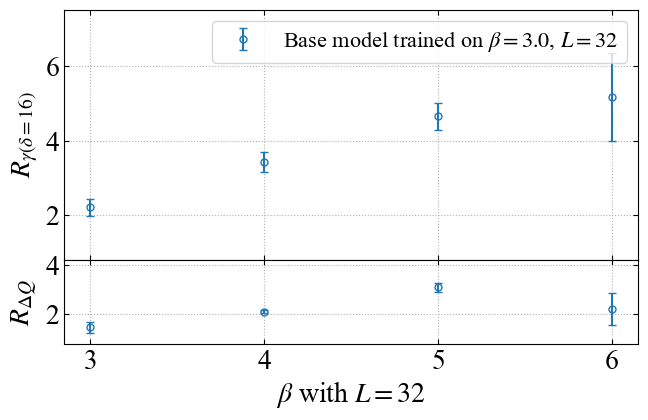

In [14]:

fig, (ax1, ax2) = default_sub_plot()
# Adjust subplot spacing
plt.subplots_adjust(left=0.1,    # Increase left margin
                    right=0.95,    # Decrease right margin
                    bottom=0.15,   # Increase bottom margin 
                    top=0.95)      # Decrease top margin

ax1.errorbar(np.arange(3, 7), [gamma_ratio_L32_b3_mean, gamma_ratio_L32_b4_mean, gamma_ratio_L32_b5_mean, gamma_ratio_L32_b6_mean], yerr=[gamma_ratio_L32_b3_std, gamma_ratio_L32_b4_std, gamma_ratio_L32_b5_std, gamma_ratio_L32_b6_std], label='Base model trained on $\\beta=3.0$, $L=32$', **errorb_circle)
ax2.errorbar(np.arange(3, 7), [deltaQ_fthmc_L32_b3_mean / deltaQ_hmc_L32_b3_mean, deltaQ_fthmc_L32_b4_mean / deltaQ_hmc_L32_b4_mean, deltaQ_fthmc_L32_b5_mean / deltaQ_hmc_L32_b5_mean, deltaQ_fthmc_L32_b6_mean / deltaQ_hmc_L32_b6_mean], yerr=[deltaQ_fthmc_L32_b3_std / deltaQ_hmc_L32_b3_mean, deltaQ_fthmc_L32_b4_std / deltaQ_hmc_L32_b4_mean, deltaQ_fthmc_L32_b5_std / deltaQ_hmc_L32_b5_mean, deltaQ_fthmc_L32_b6_std / deltaQ_hmc_L32_b6_mean], **errorb_circle)
ax1.set_ylabel('$R_{\\gamma (\\delta =16)}$', **fs_p)
ax1.set_ylim(0.8, 7.5)
ax2.set_xlabel('$\\beta$ with $L=32$', **fs_p)
ax2.set_ylabel('$R_{\\Delta Q}$', **fs_p)
ax2.set_ylim(0.8, 4.2)
ax1.legend(ncol=2, loc='upper right', **fs_small_p)
# plt.tight_layout()
plt.savefig('plots/performance_L32.pdf', transparent=True)
plt.show()